<a href="https://colab.research.google.com/github/pritkudale/ML-for-Teachers/blob/main/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps in Machine Learning Model Building
## 1. Problem statement
- Create a regression model for predicting the sales
- Which media are associated with sales?
- Which media generate the biggest boost in sales?
- How large of an increase in sales is associated with a given increase
in TV advertising?

## 2. Data Collection


In [46]:
# prompt: https://raw.githubusercontent.com/pritkudale/ML-for-Teachers/refs/heads/main/Linear%20Regression/Advertising.csv import this daqtaset

import pandas as pd

# Download the dataset from the provided URL
!wget https://raw.githubusercontent.com/pritkudale/ML-for-Teachers/refs/heads/main/Linear%20Regression/Advertising.csv

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Advertising.csv')

# Display the first few rows of the DataFrame
df.head()

--2024-12-12 10:52:22--  https://raw.githubusercontent.com/pritkudale/ML-for-Teachers/refs/heads/main/Linear%20Regression/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4213 (4.1K) [text/plain]
Saving to: ‘Advertising.csv.1’

Advertising.csv.1   100%[===================>]   4.11K  --.-KB/s    in 0s      

2024-12-12 10:52:22 (43.8 MB/s) - ‘Advertising.csv.1’ saved [4213/4213]



,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 3. Data Processing

- Step 1: Import the necessary libraries
- Step 2: Load the dataset
- Step 3: Explore the dataset
- Step 4: Statistical Analysis
- Step 5: Check the outliers
- Step 6: Correlation
- Step 7: Separate independent features and Target Variables
- Step 8: Normalization or Standardization

Step 1: Import the necessary libraries

In [47]:
# prompt: import numpy, pandas, matplotlib, seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step 3: Explore the dataset

In [48]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [49]:
# prompt: check info of data

# Display info about the DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [50]:
# prompt: check null values

# Check for null values
df.isnull().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


Step 4: Statistical Analysis

In [51]:
# prompt: describe the df

df.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Step 5: Check the outliers

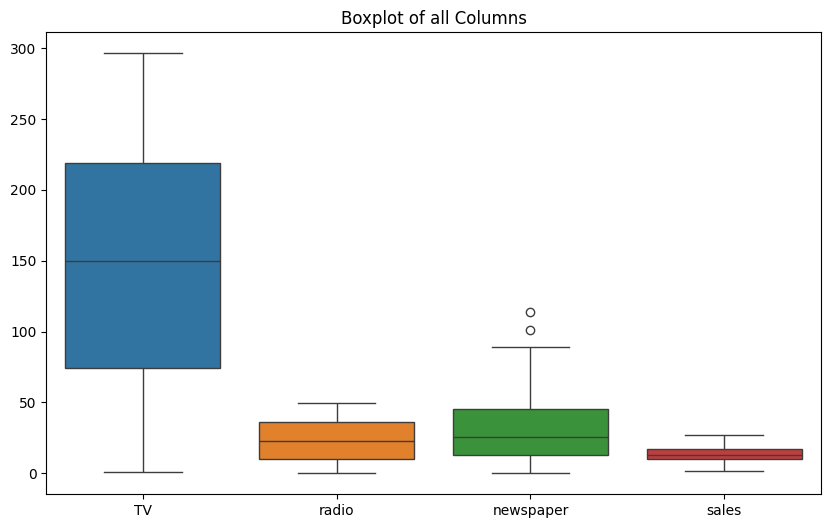

In [52]:
# prompt: plot a boxplot for all the columns

# Create the boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title('Boxplot of all Columns')
plt.show()

Handle the outlier

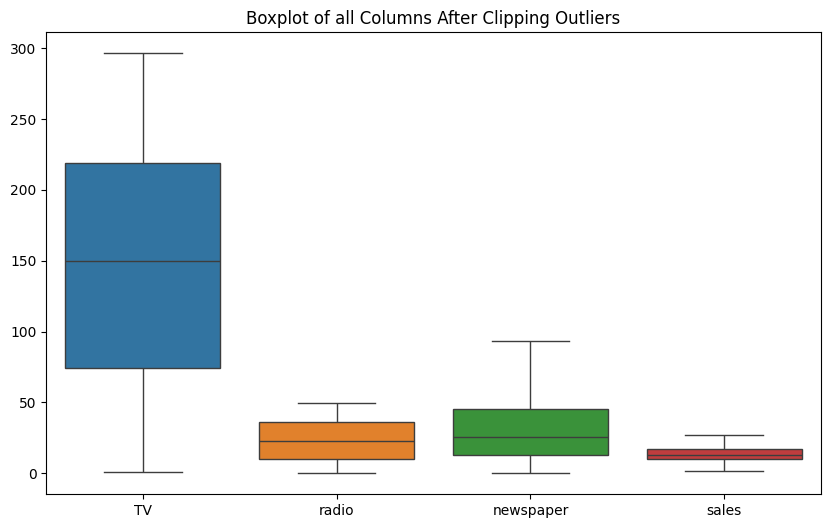

In [54]:
# prompt: clip the outliers present in newspaper

def clip_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# Apply the function to each column with outliers
for col in ['TV', 'radio', 'newspaper']:
    df = clip_outliers(df, col)

# Create the boxplot after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of all Columns After Clipping Outliers')
plt.show()

Step 6: Correlation

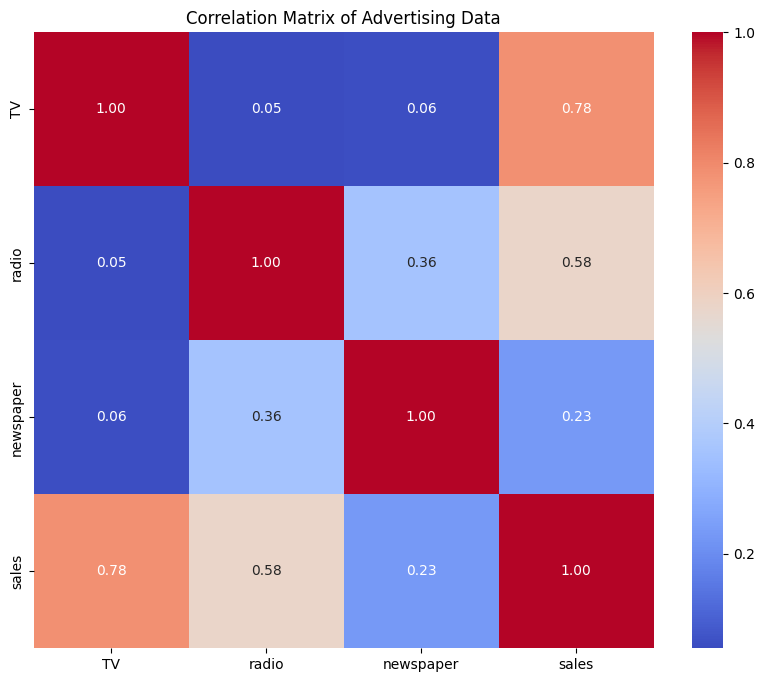

In [55]:
# prompt: plot correlation for all variable

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Advertising Data')
plt.show()

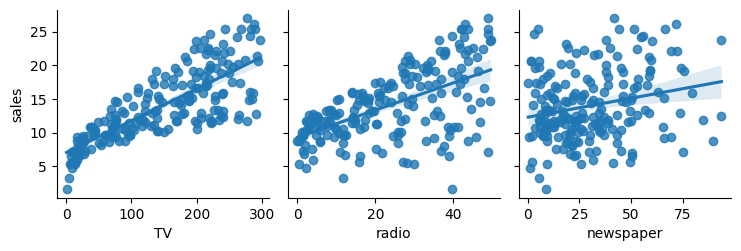

In [56]:
# prompt: plot a pair plot

# Assuming 'df' is your DataFrame (as defined in the previous code)

# Step 7: Separate independent features and target variables (if not already done)
X = df.drop('sales', axis=1)
y = df['sales']

# Create the pair plot
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', kind='reg')
plt.show()

Step 7: Separate independent features and Target Variables

In [57]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [58]:
# prompt: consider sales as dependent parameter and save it in y

# Assuming 'df' is your DataFrame (as defined in the previous code)

# Step 7: Separate independent features and target variables (if not already done)
X = df.drop('sales', axis=1)
y = df['sales']

In [59]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [60]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [61]:
X.shape

(200, 3)

In [62]:
y.shape

(200,)

Step 8: Normalization or Standardization

In [64]:
# prompt: use min max scaler on X

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## 4. Data Splitting

In [66]:
# prompt: split the data in train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# prompt: print shape of Train and test split

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (160, 3)
Shape of X_test: (40, 3)
Shape of y_train: (160,)
Shape of y_test: (40,)


## 5. Model Selection

In [69]:
# prompt: import linear regression model from sklearn

from sklearn.linear_model import LinearRegression
model = LinearRegression()


## 6. Model Training

In [70]:
# prompt: fit a model to training data

# ## 6. Model Training
model.fit(X_train, y_train)

LinearRegression()

In [71]:
# prompt: print coef

# Assuming 'model' is your trained Linear Regression model (as defined in the previous code)

# Access the coefficients
coef = model.coef_

# Print the coefficients
coef

array([13.2272524 ,  9.38532517,  0.25447137])

In [72]:
# prompt: print intercept

# Assuming 'model' is your trained Linear Regression model (as defined in the previous code)

# Access the intercept
intercept = model.intercept_

# Print the intercept
intercept

3.011402475702452

In [73]:
# prompt: create prediction on X test

# Assuming 'model' is your trained Linear Regression model and 'X_test' is your test data
# (as defined in the previous code).

y_pred = model.predict(X_test)

# Now 'y_pred' contains the predicted sales values for the test data.
# You can use 'y_pred' for further analysis or evaluation.

y_pred

array([16.40761166, 20.88995513, 21.55400278, 10.60811211, 22.11425018,
       13.10505282, 21.05810616,  7.46099883, 13.60673782, 15.15519298,
        9.04914738,  6.65274963, 14.34350102,  8.90414199,  9.68927943,
       12.16455716,  8.73579142, 16.2658669 , 10.27738152, 18.8322001 ,
       19.55940343, 13.19285276, 12.33711275, 21.30621257,  7.82798258,
        5.80922645, 20.75818869, 11.98194607,  9.1833237 ,  8.5075382 ,
       12.46650486, 10.00364092, 21.38755131, 12.24793744, 18.26659487,
       20.13914119, 14.05635727, 20.85367145, 11.01812466,  4.56859764])

## 7. Model Evaluation

In [74]:
# prompt: calculate score for training and testing

from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

#Training score
train_score = model.score(X_train,y_train)
print(f"Training Score: {train_score}")

#Testing score
test_score = model.score(X_test,y_test)
print(f"Testing Score: {test_score}")

Mean Squared Error (MSE): 3.171462185006356
R-squared (R2) Score: 0.8995215117097889
Training Score: 0.895696714060078
Testing Score: 0.8995215117097889
